# Example usage
To use `covizpy` in a project, import the package with following commands:

## Imports

In [31]:
from covizpy.get_data import get_data
from covizpy.plot_summary import plot_summary
from covizpy.plot_spec import plot_spec
from covizpy.plot_metric import plot_metric

import altair as alt
alt.data_transformers.enable("data_server")
alt.renderers.enable("altair_saver", fmts=["vega-lite", "svg"])

RendererRegistry.enable('altair_saver')

To use the functions, see below examples:

## Retrieve COVID-19 data 

We will first create a dataframe to retrieve COVID-19 data using `get_data()` function with a specified date range and default all locations.

In [32]:
df = get_data(date_from="2022-01-01", date_to="2022-01-21")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
677,AFG,Asia,Afghanistan,2022-01-01,158107.0,23.0,30.286,7356.0,0.0,1.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
678,AFG,Asia,Afghanistan,2022-01-02,158189.0,82.0,34.000,7361.0,5.0,1.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
679,AFG,Asia,Afghanistan,2022-01-03,158183.0,-6.0,30.857,7364.0,3.0,1.429,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
680,AFG,Asia,Afghanistan,2022-01-04,158205.0,22.0,29.571,7365.0,1.0,1.429,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
681,AFG,Asia,Afghanistan,2022-01-05,158245.0,40.0,29.714,7367.0,2.0,1.571,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


## Plot summary graph (bar chart)

We now create a summary bar graph using `plot_summary()` to visualize COVID-19 cases in different countries inside the specified time period.

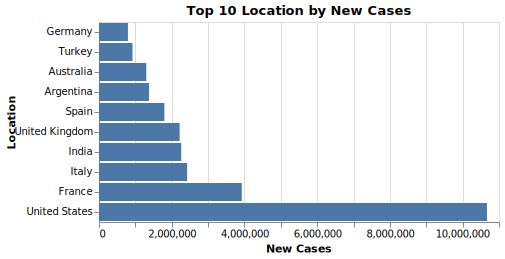

In [33]:
plot_summary(df, var="location", val="new_cases", fun="sum", date_from="2022-01-01", date_to="2022-01-15", top_n=10)

## Plot COVID-19 cases for specific countries (line chart)

After seeing the summary of COVID-19 cases in several countries, we pass in a list of countries we plot the trend of new cases in the time period using `plot_spec()` function.

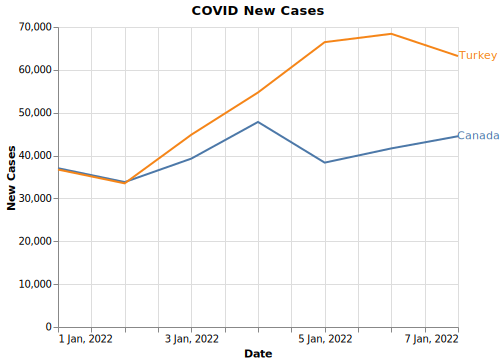

In [34]:
plot_spec(df, location=["Canada", "Turkey"], val="new_cases", date_from="2022-01-01", date_to="2022-01-07")

## Plot new COVID-19 cases versus another metric (line chart)

Now we illustrate the trend of new cases alongside another suitable metric using `plot_metric()` function.

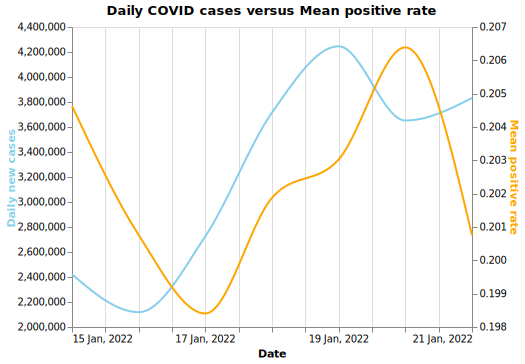

In [35]:
plot_metric(metric='positive_rate', date_from="2022-01-15", date_to="2022-01-21")